In [2]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
data = pd.ExcelFile('./obes-phys-acti-diet-eng-2017-tab.xlsx') # Remember to write your path
url = 'https://digital.nhs.uk/data-and-information/publications/statistical/statistics-on-obesity-physical-activity-and-diet/statistics-on-obesity-physical-activity-and-diet-england-2017'

In [4]:
data_age = data.parse('Table 2', skiprows = 7, skipfooter=14)

In [5]:
data_age = data_age.drop('Unnamed: 1', axis = 1).drop([0],axis=0)

In [6]:
data_age.rename(columns={'Year4,5':'Year'}, inplace=True)

In [7]:
data_age.rename(columns={'All persons6': 'Total'},inplace= True)

In [8]:
data_age

,Year,Total,Under 16,16 to 24,25 to 34,35 to 44,45 to 54,55 to 64,65 to 74,75 and over
1,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
3,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
4,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
5,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
6,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
7,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0
8,2012/13,10957.0,556.0,356.0,1437.0,2744.0,3305.0,1965.0,495.0,99.0
9,2013/14,9325.0,548.0,352.0,1209.0,2133.0,2839.0,1663.0,458.0,123.0
10,2014/15,9130.0,550.0,353.0,1201.0,1960.0,2759.0,1596.0,548.0,163.0


# Population with primary diagnosis of obesity

In [9]:
data_age['Year'] = list(range(2005,2016))

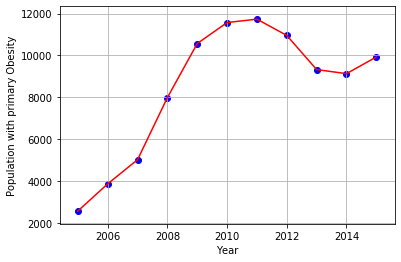

In [10]:
plt.plot(data_age['Year'],data_age['Total'],'r-')
plt.scatter(data_age['Year'],data_age['Total'],color='blue')
plt.xlabel('Year')
plt.ylabel('Population with primary Obesity')
plt.grid(True)

In [11]:
curve_fit = np.polyfit(data_age.Year,np.log(data_age.Total),3)
poly_interp = np.poly1d(curve_fit)
poly_fit_values = []
Years = np.array(list(range(2005,2020)))
for i in Years:
    poly_fit_values.append(poly_interp(i))

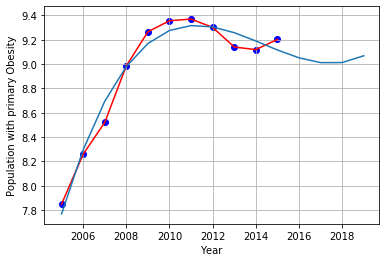

In [12]:
plt.plot(data_age['Year'],np.log(data_age['Total']),'r-')
plt.scatter(data_age['Year'],np.log(data_age['Total']),color='blue')
plt.plot(Years,poly_fit_values)
plt.xlabel('Year')
plt.ylabel('Population with primary Obesity')
plt.grid(True)

In [13]:
data_plus = pd.ExcelFile('/Obes-phys-acti-diet-eng-tab-2019.xlsx') #Remember to write your path
url = 'https://digital.nhs.uk/data-and-information/publications/statistical/statistics-on-obesity-physical-activity-and-diet/statistics-on-obesity-physical-activity-and-diet-england-2019'

In [14]:
data_age_plus = data_plus.parse('Table 1.2',skipfooter = 15,skiprows = 7)

In [15]:
data_age_plus = data_age_plus.drop('Unnamed: 1',axis=1).drop([0],axis=0)
data_age_plus.rename(columns={'Year4':'Year'}, inplace=True)
data_age_plus.rename(columns={'All ages5': 'Total'},inplace= True)

In [16]:
data_age_plus = data_age_plus.loc[range(10,12),:]
data_age_plus['Year'] = [2016,2017]

In [17]:
data_age.loc[12] = data_age_plus.loc[10,:]
data_age.loc[13] = data_age_plus.loc[11,:]

In [18]:
data_age

,Year,Total,Under 16,16 to 24,25 to 34,35 to 44,45 to 54,55 to 64,65 to 74,75 and over
1,2005.0,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2,2006.0,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
3,2007.0,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
4,2008.0,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
5,2009.0,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
6,2010.0,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
7,2011.0,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0
8,2012.0,10957.0,556.0,356.0,1437.0,2744.0,3305.0,1965.0,495.0,99.0
9,2013.0,9325.0,548.0,352.0,1209.0,2133.0,2839.0,1663.0,458.0,123.0
10,2014.0,9130.0,550.0,353.0,1201.0,1960.0,2759.0,1596.0,548.0,163.0


In [19]:
curve_fit2 = np.polyfit(data_age.Year.to_list(),data_age.Total,3)
poly_interp = np.poly1d(curve_fit2)
poly_fit_values = []
Years = np.array(list(range(2005,2020)))
for i in Years:
    poly_fit_values.append(poly_interp(i))

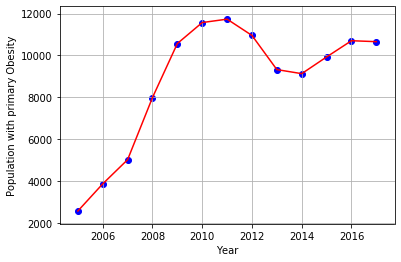

In [20]:
plt.plot(data_age['Year'],data_age['Total'],'r-')
plt.scatter(data_age['Year'],data_age['Total'],color='blue')
plt.xlabel('Year')
plt.ylabel('Population with primary Obesity')
plt.grid(True)

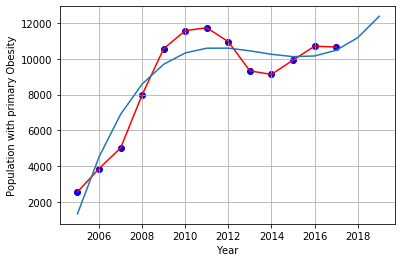

In [21]:
plt.plot(data_age['Year'],data_age['Total'],'r-')
plt.scatter(data_age['Year'],data_age['Total'],color='blue')
plt.plot(Years,poly_fit_values)
plt.xlabel('Year')
plt.ylabel('Population with primary Obesity')
plt.grid(True)

In [22]:
# The amount of people with primary diagnosis could tend to increase

In [23]:
import seaborn as sns

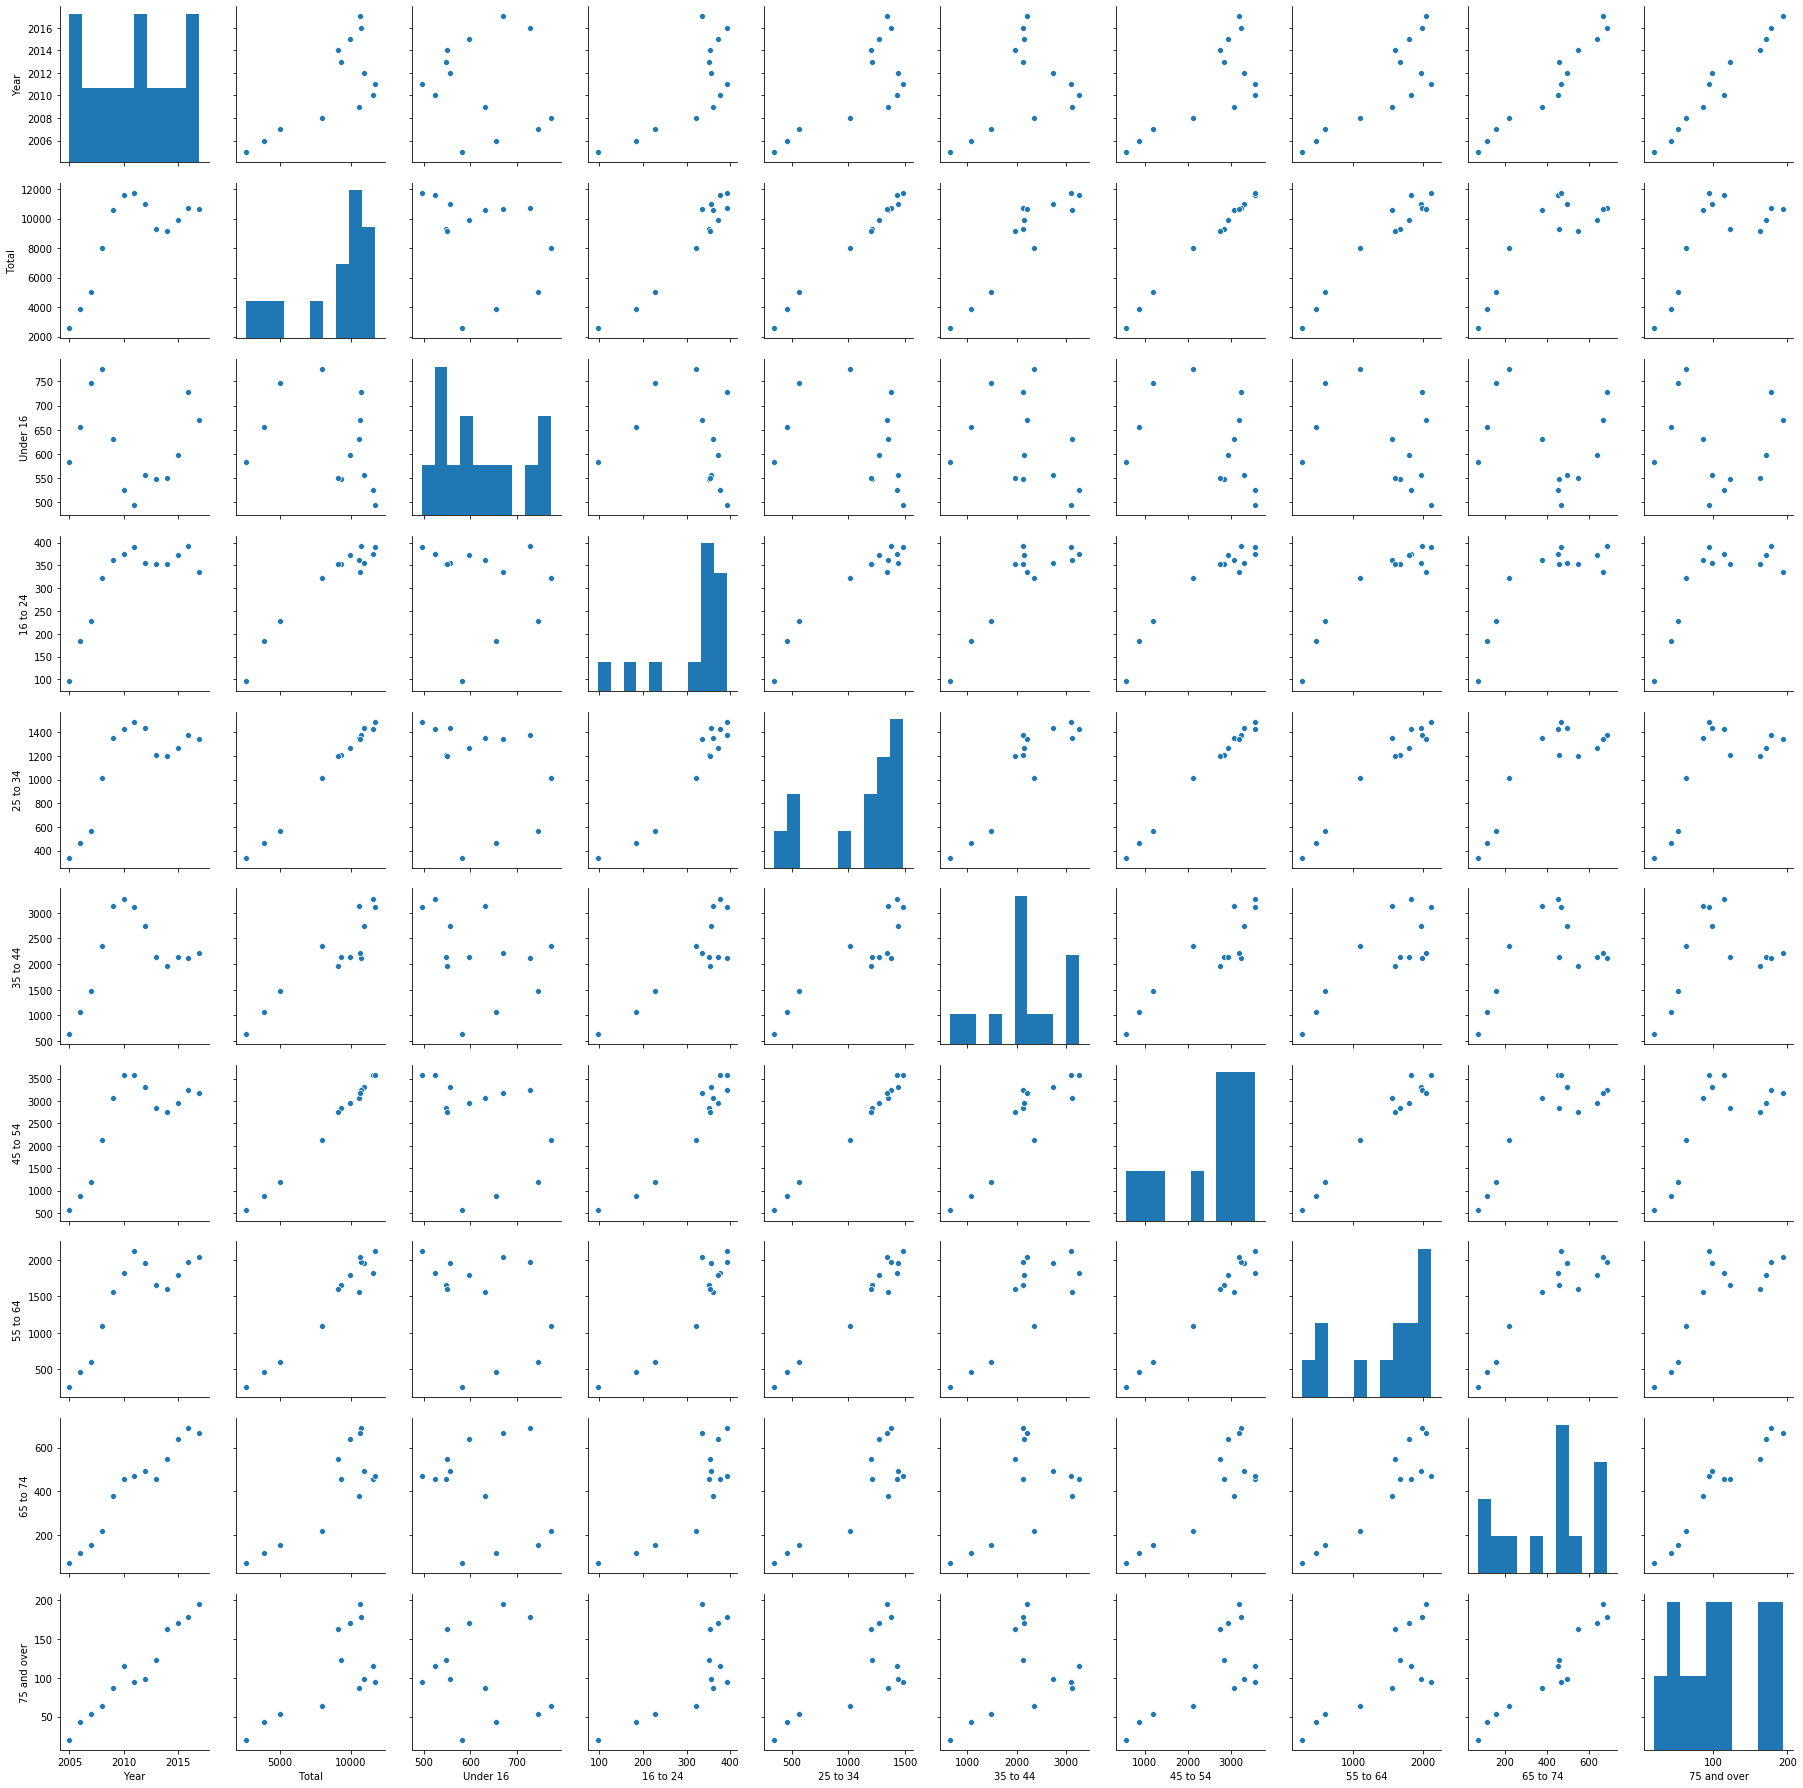

In [24]:
sns.pairplot(data_age)

In [25]:
#Obesity is just increasing along the time and among the ages

# Population with primary or secondary diagnosis of obesity

In [26]:
data_age_s = data.parse('Table 6', skiprows = 7, skipfooter=13)
data_age_plus_s = data_plus.parse('Table 2.2',skipfooter = 14,skiprows = 7)

In [27]:
data_age_s = data_age_s.drop('Unnamed: 1', axis = 1).drop([0],axis=0)
data_age_s.rename(columns={'Year4':'Year'}, inplace=True)
data_age_s.rename(columns={'All persons5': 'Total'},inplace= True)
data_age_plus_s = data_age_plus_s.drop('Unnamed: 1',axis=1).drop([0],axis=0)
data_age_plus_s.rename(columns={'Year4':'Year'}, inplace=True)
data_age_plus_s.rename(columns={'All ages5': 'Total'},inplace= True)

In [28]:
data_age_s.loc[12] = data_age_plus_s.loc[10,:]
data_age_s.loc[13] = data_age_plus_s.loc[11,:]

In [29]:
data_age_s['Year'] = list(range(2005,2018))

In [30]:
data_age_s

,Year,Total,Under 16,16 to 24,25 to 34,35 to 44,45 to 54,55 to 64,65 to 74,75 and over
1,2005,52019.0,1727.0,1717.0,4252.0,7401.0,9858.0,12146.0,10056.0,4840.0
2,2006,67211.0,1896.0,2316.0,5319.0,9961.0,12922.0,15882.0,12571.0,6296.0
3,2007,80914.0,2104.0,3169.0,7218.0,12101.0,15683.0,18489.0,14496.0,7512.0
4,2008,102987.0,2229.0,4326.0,9899.0,15508.0,19971.0,23136.0,18234.0,9531.0
5,2009,142219.0,2400.0,6609.0,15490.0,21344.0,27641.0,30884.0,24294.0,13399.0
6,2010,211783.0,2762.0,12042.0,26965.0,30606.0,39258.0,43754.0,36056.0,20056.0
7,2011,266666.0,2824.0,16016.0,37060.0,37098.0,47514.0,53209.0,45949.0,26989.0
8,2012,292404.0,3115.0,18849.0,43681.0,39627.0,51364.0,55676.0,50262.0,29822.0
9,2013,365577.0,3011.0,23743.0,59059.0,47629.0,61823.0,68175.0,63735.0,38393.0
10,2014,440288.0,3357.0,28321.0,71483.0,56598.0,73281.0,80400.0,79101.0,47732.0


In [31]:
curve_fit3 = np.polyfit(data_age_s.Year.to_list(),data_age_s.Total,2)
poly_interp = np.poly1d(curve_fit3)
poly_fit_values = []
Years = np.array(list(range(2005,2020)))
for i in Years:
    poly_fit_values.append(poly_interp(i))

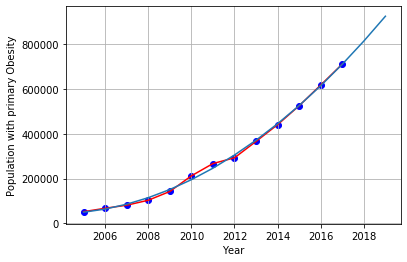

In [32]:
plt.plot(data_age_s['Year'],data_age_s['Total'],'r-')
plt.scatter(data_age_s['Year'],data_age_s['Total'],color='blue')
plt.plot(Years,poly_fit_values)
plt.xlabel('Year')
plt.ylabel('Population with primary Obesity')
plt.grid(True)

In [33]:
# This plot shows that the population with second or primary diagnosis of obesit is increasing

In [ ]:
sns.pairplot(data_age_s)

In [ ]:
# as seen in the graphics cases of premary or secondary diagnosis will only increase